In [1]:
import pandas as pd

df = pd.read_csv("CAR DETAILS.csv")
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can handle them using methods like:
# df.dropna()  # To drop rows with missing values
# df.fillna(value)  # To fill missing values with a specific value
df.to_csv("cleaned_car_details.csv", index=False)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from the CSV file
df = pd.read_csv("CAR DETAILS.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Handling Null Values
print("\nMissing Values:")
print(df.isnull().sum())

# It seems there are no missing values in this dataset.
# If there were any, you could handle them using:
# df.dropna(inplace=True)  # To drop rows with missing values
# df.fillna(value, inplace=True)  # To fill missing values with a specific value

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission", "owner"], drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nEncoded Data:")
print(df_encoded.head())

# Imputation (Fill Missing Values)
# For demonstration purposes, we'll artificially create missing values in "selling_price" and "km_driven".
df_encoded.loc[2, "selling_price"] = None
df_encoded.loc[8, "km_driven"] = None

# Impute missing values with median
df_encoded["selling_price"].fillna(df_encoded["selling_price"].median(), inplace=True)
df_encoded["km_driven"].fillna(df_encoded["km_driven"].median(), inplace=True)

# Display the first few rows of the DataFrame after imputation
print("\nImputed Data:")
print(df_encoded.head())

# Feature Scaling (Min-Max Scaling)
scaler = MinMaxScaler()

# Scale the "selling_price" and "km_driven" columns
df_encoded[["selling_price", "km_driven"]] = scaler.fit_transform(df_encoded[["selling_price", "km_driven"]])

# Display the first few rows of the DataFrame after scaling
print("\nScaled Data:")
print(df_encoded.head())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Missing Values:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Encoded Data:
                       name  year  selling_price  km_driven  fuel_Diesel  \
0             Maruti 800 AC  2007         

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), objec

C:\Users\AFZAL\AppData\Local\Temp\ipykernel_10920\1882695527.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


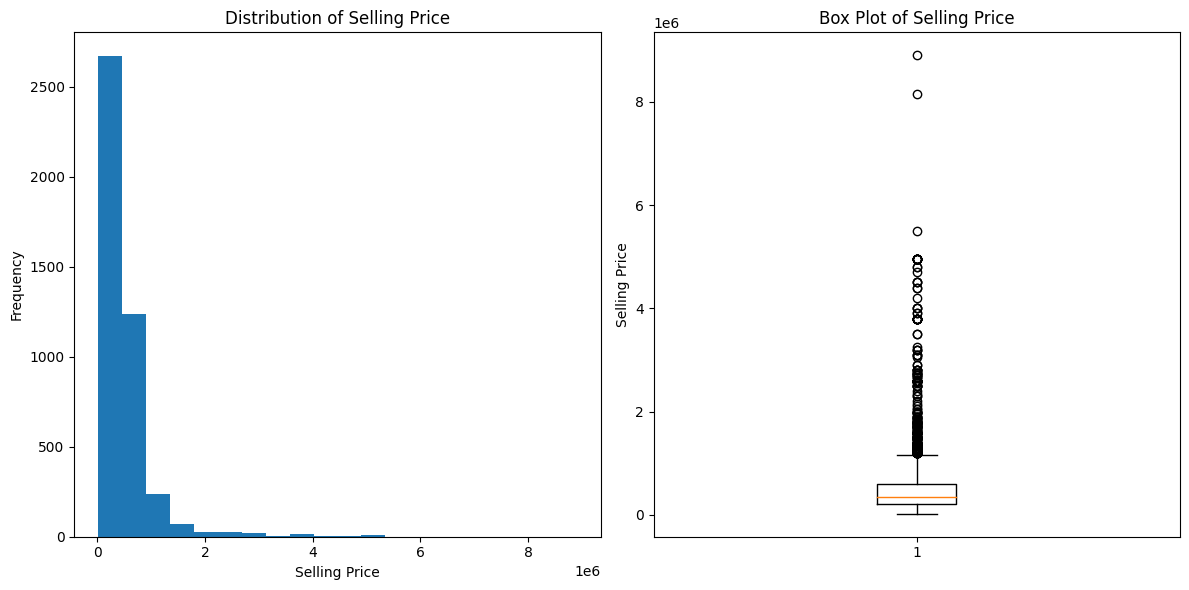

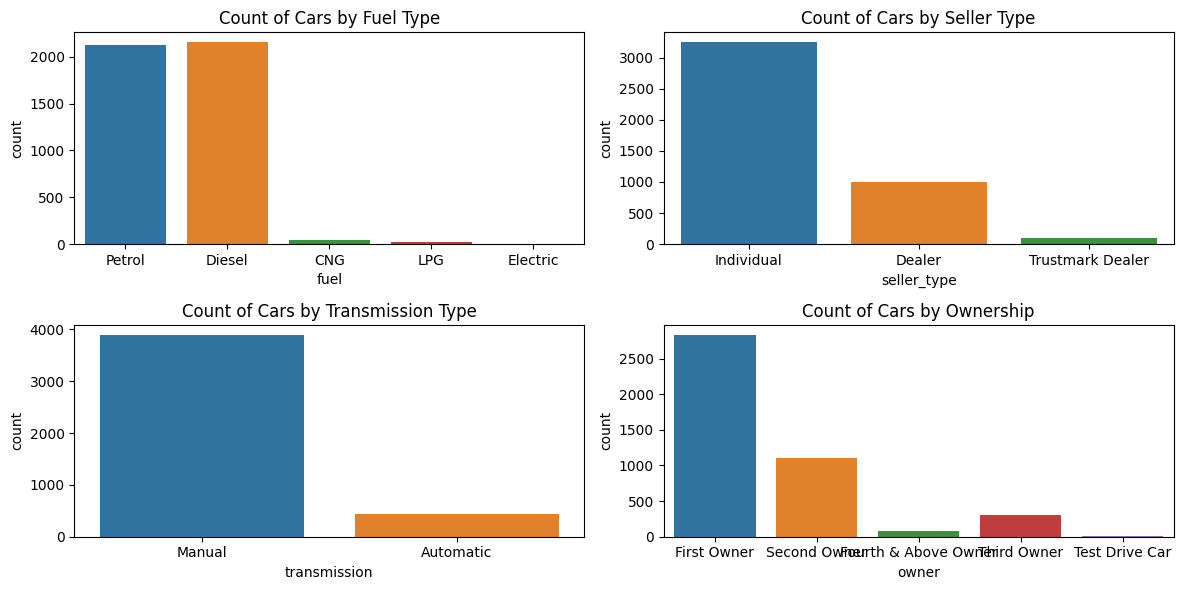

In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv("CAR DETAILS.csv")

# Display basic statistics of the dataset
print(df.describe())

# Get information about the columns, data types, and non-null counts
print(df.info())

# Correlation analysis
correlation_matrix = df.corr()
print(correlation_matrix)

# Explore the distribution of numerical features using histograms or box plots
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['selling_price'], bins=20)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price')

plt.subplot(1, 2, 2)
plt.boxplot(df['selling_price'])
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price')

plt.tight_layout()
plt.show()

# Explore the distribution of categorical features using count plots
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='fuel', data=df)
plt.title('Count of Cars by Fuel Type')

plt.subplot(2, 2, 2)
sns.countplot(x='seller_type', data=df)
plt.title('Count of Cars by Seller Type')

plt.subplot(2, 2, 3)
sns.countplot(x='transmission', data=df)
plt.title('Count of Cars by Transmission Type')

plt.subplot(2, 2, 4)
sns.countplot(x='owner', data=df)
plt.title('Count of Cars by Ownership')

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from the CSV file
df = pd.read_csv("CAR DETAILS.csv")

# Drop the "name" column as it contains non-numeric values and is not required for modeling
df.drop("name", axis=1, inplace=True)

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission", "owner"], drop_first=True)

# Feature Scaling (MinMax Scaling)
scaler = MinMaxScaler()
df_encoded[["year", "km_driven"]] = scaler.fit_transform(df_encoded[["year", "km_driven"]])

# Separate the Features and Target
X = df_encoded.drop("selling_price", axis=1)  # Features (excluding "selling_price")
y = df_encoded["selling_price"]  # Target variable ("selling_price")

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Feature Selection (SelectKBest with mutual information score)
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(score_func=mutual_info_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset from the CSV file
df = pd.read_csv("CAR DETAILS.csv")

# Drop the "name" column as it contains non-numeric values and is not required for modeling
df.drop("name", axis=1, inplace=True)

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission", "owner"], drop_first=True)

# Feature Scaling (MinMax Scaling)
scaler = MinMaxScaler()
df_encoded[["year", "km_driven"]] = scaler.fit_transform(df_encoded[["year", "km_driven"]])

# Separate the Features and Target
X = df_encoded.drop("selling_price", axis=1)  # Features (excluding "selling_price")
y = df_encoded["selling_price"]  # Target variable ("selling_price")

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\n{name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")



Linear Regression Metrics:
Mean Squared Error (MSE): 182146878750.28
R-squared (R2): 0.40
Mean Absolute Error (MAE): 221706.37

Random Forest Regressor Metrics:
Mean Squared Error (MSE): 154449101971.74
R-squared (R2): 0.49
Mean Absolute Error (MAE): 169337.30

Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 157459235479.06
R-squared (R2): 0.48
Mean Absolute Error (MAE): 174955.75


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Load the dataset from the CSV file
df = pd.read_csv("CAR DETAILS.csv")

# Drop the "name" column as it contains non-numeric values and is not required for modeling
df.drop("name", axis=1, inplace=True)

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission", "owner"], drop_first=True)

# Feature Scaling (MinMax Scaling)
scaler = MinMaxScaler()
df_encoded[["year", "km_driven"]] = scaler.fit_transform(df_encoded[["year", "km_driven"]])

# Separate the Features and Target
X = df_encoded.drop("selling_price", axis=1)  # Features (excluding "selling_price")
y = df_encoded["selling_price"]  # Target variable ("selling_price")

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Best Model: Gradient Boosting Regressor
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Save the Best Model
joblib.dump(best_model, "best_model.pkl")

# Load the Best Model
loaded_model = joblib.load("best_model.pkl")

# Make Predictions using the Loaded Model
y_pred = loaded_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nLoaded Model Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")



Loaded Model Metrics:
Mean Squared Error (MSE): 157459235479.06
R-squared (R2): 0.48
Mean Absolute Error (MAE): 174955.75


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load the original dataset from the CSV file
df = pd.read_csv("CAR DETAILS.csv")

# Drop the "name" column as it contains non-numeric values and is not required for modeling
df.drop("name", axis=1, inplace=True)

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission", "owner"], drop_first=True)

# Feature Scaling (MinMax Scaling)
scaler = MinMaxScaler()
df_encoded[["year", "km_driven"]] = scaler.fit_transform(df_encoded[["year", "km_driven"]])

# Separate the Features and Target
X = df_encoded.drop("selling_price", axis=1)  # Features (excluding "selling_price")
y = df_encoded["selling_price"]  # Target variable ("selling_price")

# Load the saved best model
loaded_model = joblib.load("best_model.pkl")

# Randomly pick 20 data points from the original dataset
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(X.index, size=20, replace=False)
new_dataset = X.loc[random_indices]
actual_prices = y.loc[random_indices]

# Apply the loaded model on the new dataset for predictions
predicted_prices = loaded_model.predict(new_dataset)

# Create a DataFrame to compare actual and predicted prices
result_df = pd.DataFrame({"Actual Price": actual_prices.values, "Predicted Price": predicted_prices})

print(result_df)


    Actual Price  Predicted Price
0         165000     2.805637e+05
1         250000     4.855637e+05
2         120000     1.313053e+05
3         450000     4.887846e+05
4         730000     1.767717e+06
5         155000     2.422147e+05
6         530000     4.173641e+05
7          92800     2.488831e+05
8         284000     6.236300e+05
9         260000     2.640914e+05
10        511000     5.870576e+05
11       1800000     4.813579e+05
12        320000     5.480796e+05
13         90000     1.787213e+05
14        850000     4.894997e+05
15        500000     5.014399e+05
16        624000     8.962246e+05
17        750000     1.343683e+06
18        125000     1.601843e+05
19        675000     1.455924e+06
